In [ ]:
i

In the next few sections, we introduce several deep learning methods for object detection. we will begin with an introduction to positions or locations of objects:

In [1]:
import torch
import matplotlib.pyplot as plt

In [27]:
import numpy as np

In [46]:
from matplotlib.patches import Rectangle

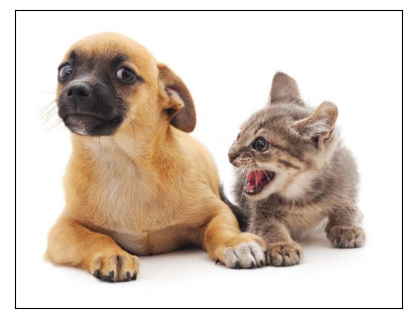

In [25]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
path = "../../data/img/catdog.jpg"
img = plt.imread(path)
ax.imshow(img)
ax.set_xticks([]); ax.set_yticks([]);

Bounding Boxes:

In object detection, we use a bounding box to describe the spatial location of an object. The bounding box is rectangular, which is determined by the x and y coordinates of the upper-left corner of the rectangle and the such coordinates of the lower-right corner. Another commonly used bounding box representation is the (x,y)-axis coordinates of the bounding box center, and the width and height of the box. 
Here, we now define functions to convert between these 2 representations: box_corner_to_corner converts from the two-corner representation to the center-width-height presentation, and box_center_to_corner vice versa. The input argument boxes should be a 2-dimensional tensor of shape (n,4), where n is the number of bounding boxes.

In [20]:
def box_corner_to_center(boxes):
    """Convert from (upper-left, lower-right) to (center, width, height)."""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

In [21]:
def box_center_to_corner(boxes):
    """Convert from (center, width, height) to (upper-left, lower-right)."""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

we will define the bounding boxes of the dog and cat in the image based on the coordinate information. the origin of the coordinates in the image is the upper-left corner of the image, and to the right and down are the positive directions of the x and y axes

In [22]:
# Here `bbox` is the abbreviation for bounding box
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [23]:
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

Draw the bounding boxes to check they are accurate: use helper function bbox_to_rect.

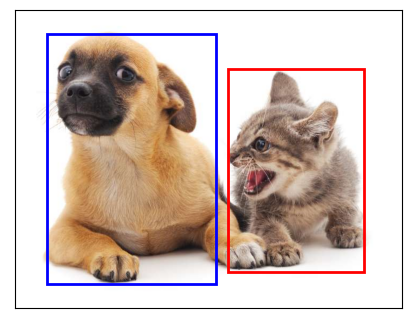

In [61]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
path = "../../data/img/catdog.jpg"
img = plt.imread(path)
ax.imshow(img)
ax.add_patch(Rectangle(xy=(dog_bbox[0],dog_bbox[1]), width = dog_bbox[2] - dog_bbox[0],\
            height=dog_bbox[3] - dog_bbox[1],fill=False, edgecolor="blue",\
            linewidth=2))
ax.add_patch(Rectangle(xy=(cat_bbox[0],cat_bbox[1]), width = cat_bbox[2] - cat_bbox[0],\
             height=cat_bbox[3] - cat_bbox[1],fill=False, edgecolor="red",\
            linewidth=2))
ax.set_xticks([]); ax.set_yticks([]);

In [45]:
bbox_to_rect(dog_bbox)

array([ 60., 516., 318., 471.])

In [9]:
z = torch.rand((5,4))

In [10]:
z.shape

torch.Size([5, 4])

In [11]:
a = z[:,0]
b = z[:,1]
c = z[:,2]
d = z[:,3]

In [14]:
torch.stack((a,b,c,d), axis=-1)

tensor([[0.4846, 0.6495, 0.6648, 0.3377],
        [0.0521, 0.5247, 0.6824, 0.1957],
        [0.8212, 0.2241, 0.9076, 0.9017],
        [0.8456, 0.5746, 0.9690, 0.7413],
        [0.5611, 0.2178, 0.3354, 0.4444]])

In [7]:
img.shape

(561, 728, 3)

img